# ML code written on Oct,24,2022 #

*wawfmp15222*

resourses -> https://colab.research.google.com/drive/1NbGVUcdpgArXXpD3fONJlap9p3kYasN8#scrollTo=s2G0TVN-dgoW ,,
https://github.com/muna-mohammed/New-York-City-property-sales-EDA
    , 

the dataset is from -> https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [91]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv")

# **Basic EDA** #

In [6]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [7]:
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [11]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [12]:
df.shape

(2938, 22)

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [114]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.052451,-0.031049,0.009421,-0.089871,0.074411,0.116534,-0.047773,0.006612,0.011595,-0.017721,0.085266,0.041475,-0.101926,0.095037,0.010989,0.025714,0.021641,0.129520,0.106314
Life expectancy,0.052451,1.000000,-0.703598,-0.178755,0.353004,0.402999,0.227620,-0.080071,0.510816,-0.201021,0.348396,0.129467,0.343990,-0.581693,0.426780,-0.022956,-0.436592,-0.437703,0.692107,0.703518
Adult Mortality,-0.031049,-0.703598,1.000000,0.058599,-0.127564,-0.236769,-0.141537,0.010858,-0.347258,0.075779,-0.221107,-0.039456,-0.203626,0.541558,-0.266449,-0.012131,0.258664,0.273086,-0.449290,-0.423245
infant deaths,0.009421,-0.178755,0.058599,1.000000,-0.094108,-0.086580,-0.226001,0.535559,-0.223124,0.996923,-0.159920,-0.116360,-0.159706,0.019789,-0.106156,0.668786,0.439603,0.439286,-0.134275,-0.204463
Alcohol,-0.089871,0.353004,-0.127564,-0.094108,1.000000,0.345365,0.065291,-0.042807,0.278162,-0.088602,0.185853,0.262447,0.180509,-0.013742,0.282991,-0.024353,-0.401024,-0.382150,0.430515,0.532900
percentage expenditure,0.074411,0.402999,-0.236769,-0.086580,0.345365,1.000000,0.018802,-0.059137,0.221952,-0.087507,0.126944,0.128811,0.120427,-0.087346,0.896078,-0.015202,-0.241639,-0.243255,0.381954,0.396346
Hepatitis B,0.116534,0.227620,-0.141537,-0.226001,0.065291,0.018802,1.000000,-0.127131,0.145515,-0.234699,0.479156,0.066310,0.585540,-0.105064,0.074142,-0.119665,-0.118951,-0.124027,0.189864,0.211842
Measles,-0.047773,-0.080071,0.010858,0.535559,-0.042807,-0.059137,-0.127131,1.000000,-0.149225,0.520682,-0.066074,-0.088765,-0.063369,0.006884,-0.073639,0.320840,0.178142,0.173908,-0.063632,-0.113867
BMI,0.006612,0.510816,-0.347258,-0.223124,0.278162,0.221952,0.145515,-0.149225,1.000000,-0.230442,0.191288,0.163719,0.174530,-0.208776,0.251559,-0.074350,-0.516325,-0.524596,0.477463,0.517532
under-five deaths,0.011595,-0.201021,0.075779,0.996923,-0.088602,-0.087507,-0.234699,0.520682,-0.230442,1.000000,-0.173588,-0.115092,-0.175303,0.031821,-0.108322,0.655805,0.440560,0.439325,-0.146367,-0.214902


<AxesSubplot:>

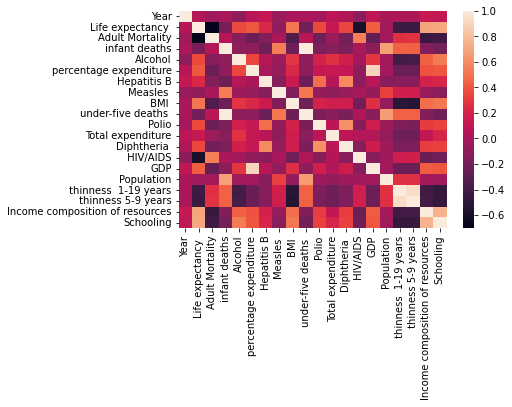

In [115]:
# plot the heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Let's select some features that we want to use for regression.

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

no_df = df.select_dtypes(include=numerics)
no_df.head()
# show the numerical columns, to use them in regression

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
no_df.shape

(2938, 20)

we gonna to select only some of these 20 numerical columns to use them in regression

rdf = df[['Life expectancy', 'Adult Mortality', 'infant deaths', 'percentage expenditure', 'BMI', 'GDP', 'Population', 'Schooling']]

--> the above line show an keyerror life expectancy and BMI not in index
solve it from stackoverflow : https://stackoverflow.com/questions/38462920/pandas-keyerror-value-not-in-index

In [36]:
rdf = df[['Life expectancy ', 'Adult Mortality', 'infant deaths', 'percentage expenditure', ' BMI ', 'GDP', 'Population', 'Schooling']]

we fix the keyerror by looking to the cell that its output of 

df.columns

we find that 'Life expectancy ' not 'Life expectancy' there is space after y and ' 
and ' BMI ' space before and after BMI and its ''

In [37]:
rdf.head()

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,BMI,GDP,Population,Schooling
0,65.0,263.0,62,71.279624,19.1,584.259210,33736494.0,10.1
1,59.9,271.0,64,73.523582,18.6,612.696514,327582.0,10.0
2,59.9,268.0,66,73.219243,18.1,631.744976,31731688.0,9.9
3,59.5,272.0,69,78.184215,17.6,669.959000,3696958.0,9.8
4,59.2,275.0,71,7.097109,17.2,63.537231,2978599.0,9.5


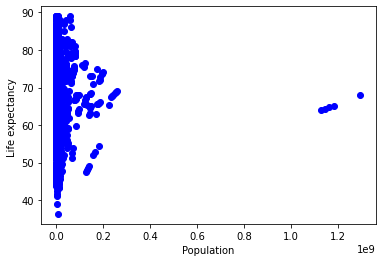

In [50]:
plt.scatter(rdf['Population'], rdf['Life expectancy '], color='blue')
plt.xlabel('Population')
plt.ylabel('Life expectancy ')
plt.show()

but here life expectancy and BMI become NaN

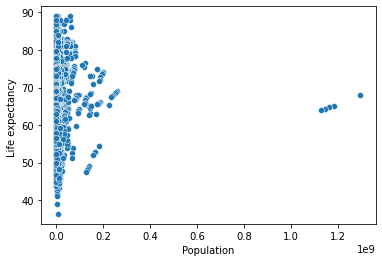

In [52]:
sns.scatterplot(x=df['Population'],y=df['Life expectancy ']);

# treatment with null values # 

In [65]:
rdf.isnull().sum()

Life expectancy            10
Adult Mortality            10
infant deaths               0
percentage expenditure      0
 BMI                       34
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [71]:
df['Life expectancy ']=rdf['Life expectancy '].fillna(rdf['Life expectancy '].mean())
# fill the missing data with its mean using mean becuase its numeric 

In [93]:
rdf.isnull().sum()

Life expectancy             0
Adult Mortality            10
infant deaths               0
percentage expenditure      0
 BMI                       34
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [105]:
df[' BMI ']=rdf[' BMI '].fillna(rdf[' BMI '].mean())
rdf.isnull().sum()

Life expectancy             0
Adult Mortality            10
infant deaths               0
percentage expenditure      0
 BMI                        0
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [110]:
df['GDP']=rdf['GDP'].fillna(value=rdf['GDP'].mean())
rdf.isnull().sum()

Life expectancy             0
Adult Mortality            10
infant deaths               0
percentage expenditure      0
 BMI                        0
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [129]:
df['Population']=rdf['Population'].fillna(value=rdf['Population'].mean())


In [130]:
df['Adult Mortality']=rdf['Adult Mortality'].fillna(value=rdf['Adult Mortality'].mean())

In [131]:
rdf.isnull().sum()

Life expectancy             0
Adult Mortality            10
infant deaths               0
percentage expenditure      0
 BMI                        0
GDP                       448
Population                652
Schooling                 163
dtype: int64

In [138]:
rdf.head()

,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,BMI,GDP,Population,Schooling
0,65.0,263.0,62,71.279624,19.1,584.259210,33736494.0,10.1
1,59.9,271.0,64,73.523582,18.6,612.696514,327582.0,10.0
2,59.9,268.0,66,73.219243,18.1,631.744976,31731688.0,9.9
3,59.5,272.0,69,78.184215,17.6,669.959000,3696958.0,9.8
4,59.2,275.0,71,7.097109,17.2,63.537231,2978599.0,9.5


# train/ teat split # 

use mask numpy feature instead of



In [146]:
y = rdf['Life expectancy ']
X = rdf[['infant deaths', 'percentage expenditure', ' BMI ']]
X.shape , y.shape

((2938, 3), (2938,))

In [147]:
X_train ,X_test, Y_train , Y_test = train_test_split(X, y, test_size = 0.2 , random_state =42)

In [134]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [135]:
# linear regression
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
rmse(Y_test, y_pred)

7.121510692087658

In [136]:
# lasso regresssion
alpha = 0.00099
lasso_reg = Lasso(alpha, max_iter=50000)
lasso_reg.fit(X_train, Y_train)
y_pred = lasso_reg.predict(X_test)
rmse(Y_test, y_pred)

7.121510816277444

In [137]:
# random forest regressor
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, Y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(Y_test,Y_pred_rf)

4.537548573753025

In [139]:
linear_reg = LinearRegression()
x = df.GDP.values.reshape(-1,1)
y = df['percentage expenditure'].values.reshape(-1,1)          

linear_reg.fit(x,y)

LinearRegression()

In [140]:
b0 = linear_reg.predict(([[10000]]))       
print("b0: ", b0)

b1 = linear_reg.coef_
print("b1: ", b1)

b0:  [[1072.09266658]]
b1:  [[0.12400227]]


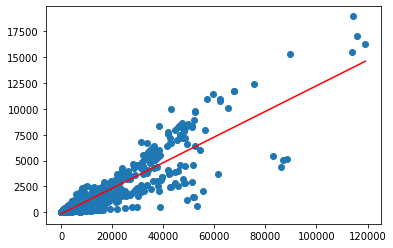

Mean Absolute Error:  52366.1656955372
Mean Squared Error:  3650397900.55494
Root Mean Squared Error:  60418.52282665425


In [141]:
x_array = np.arange(min(df.GDP),max(df.GDP)).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 # this is predict percentage of expenditure
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [142]:
from sklearn.metrics import mean_squared_error, r2_score 
print(r2_score(y, linear_reg.predict(x)))

0.8029564474416753
